In [1]:
pip install datasets scikit-learn pandas tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.2 MB/s e

In [3]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pandas as pd

In [4]:
# Define datasets and how to extract text and label
dataset_info = [
    ("BothBosu/scam-dialogue", "dialogue", "label"),
    ("BothBosu/multi-agent-scam-conversation", "dialogue", "labels"),
    ("BothBosu/youtube-scam-conversations", "dialogue", "labels"),
    ("BothBosu/Scammer-Conversation", "conversation", "label"),
    ("BothBosu/single-agent-scam-conversations", "dialogue", "labels"),
    ("OtabekRizayev/scam-data", "text", "label"),
    ("mytestaccforllm/final_scam", "input", "output")  # Assuming it's conversation + label
]

In [5]:
all_texts, all_labels = [], []

def normalize_label(label):
    """Normalize labels to 0 (not scam), 1 (scam)"""
    if isinstance(label, bool):
        return int(label)
    elif isinstance(label, str):
        label = label.lower()
        return 1 if label in ['scam', 'yes', 'true', 'spam'] else 0
    return int(label)

In [6]:
for ds_name, text_field, label_field in tqdm(dataset_info, desc="Loading Datasets"):
    ds = load_dataset(ds_name)
    for split in ['train', 'test']:  # Use both train and test for training
        if split in ds:
            for item in ds[split]:
                if text_field in item and label_field in item:
                    all_texts.append(item[text_field])
                    all_labels.append(normalize_label(item[label_field]))

Loading Datasets:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.97k [00:00<?, ?B/s]

scam-dialogue_train.csv:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

scam-dialogue_test.csv:   0%|          | 0.00/453k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

Loading Datasets:  14%|█▍        | 1/7 [00:03<00:20,  3.42s/it]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

agent_conversation_train.csv:   0%|          | 0.00/3.84M [00:00<?, ?B/s]

agent_conversation_test.csv:   0%|          | 0.00/986k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

Loading Datasets:  29%|██▊       | 2/7 [00:05<00:12,  2.46s/it]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

youtube_scam_conversations.csv:   0%|          | 0.00/55.8k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20 [00:00<?, ? examples/s]

Loading Datasets:  43%|████▎     | 3/7 [00:06<00:07,  1.83s/it]

README.md:   0%|          | 0.00/370 [00:00<?, ?B/s]

gen_conver_noIdentifier_1000.csv:   0%|          | 0.00/884k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Loading Datasets:  57%|█████▋    | 4/7 [00:07<00:04,  1.41s/it]

README.md:   0%|          | 0.00/2.90k [00:00<?, ?B/s]

single-agent-scam-dialogue_train.csv:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

single-agent-scam-dialogue_test.csv:   0%|          | 0.00/476k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/320 [00:00<?, ? examples/s]

Loading Datasets:  71%|███████▏  | 5/7 [00:08<00:02,  1.28s/it]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Scam-Data.csv:   0%|          | 0.00/4.04M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39999 [00:00<?, ? examples/s]

Loading Datasets:  86%|████████▌ | 6/7 [00:10<00:01,  1.66s/it]

final.json:   0%|          | 0.00/80.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/57182 [00:00<?, ? examples/s]

Loading Datasets: 100%|██████████| 7/7 [00:14<00:00,  2.14s/it]


In [7]:
df = pd.DataFrame({'text': all_texts, 'label': all_labels})

In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=220)

In [10]:
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [11]:
trained_models = {}

In [13]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy on Validation Split: {acc:.4f}")
    trained_models[name] = model


Training Naive Bayes...
Naive Bayes Accuracy on Validation Split: 0.9562

Training SVM...
SVM Accuracy on Validation Split: 0.9854

Training Random Forest...
Random Forest Accuracy on Validation Split: 0.9836


In [14]:
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
for name, model in trained_models.items():
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.joblib")

print("\nAll models trained and saved. Ready for testing on other datasets.")


All models trained and saved. Ready for testing on other datasets.


In [15]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Load the test dataset
test_df = pd.read_csv("/content/balanced_dataset.csv")
X_test_texts = test_df['text']
y_test = test_df['label']

# Load vectorizer and transform test data
vectorizer = joblib.load("tfidf_vectorizer.joblib")
X_test = vectorizer.transform(X_test_texts)

# Load trained models
models = {
    "Naive Bayes": joblib.load("naive_bayes_model.joblib"),
    "SVM": joblib.load("svm_model.joblib"),
    "Random Forest": joblib.load("random_forest_model.joblib")
}

# Evaluate each model
for name, model in models.items():
    print(f"\n🔍 Evaluating {name}")
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Not Scam", "Scam"]))



🔍 Evaluating Naive Bayes
✅ Accuracy: 0.7200
📊 Classification Report:
              precision    recall  f1-score   support

    Not Scam       0.68      0.84      0.75      1250
        Scam       0.79      0.60      0.68      1250

    accuracy                           0.72      2500
   macro avg       0.73      0.72      0.72      2500
weighted avg       0.73      0.72      0.72      2500


🔍 Evaluating SVM
✅ Accuracy: 0.9524
📊 Classification Report:
              precision    recall  f1-score   support

    Not Scam       0.93      0.98      0.95      1250
        Scam       0.98      0.92      0.95      1250

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500


🔍 Evaluating Random Forest
✅ Accuracy: 0.9548
📊 Classification Report:
              precision    recall  f1-score   support

    Not Scam       0.93      0.98      0.96      1250
        Scam       0.98      0.92

In [16]:
import joblib
import pickle

# Load the .joblib file
svm_model = joblib.load('svm_model.joblib')

# Save it as .pkl
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

print("✅ SVM model saved as 'svm_model.pkl'")


✅ SVM model saved as 'svm_model.pkl'


In [17]:
# Load the .joblib file
rf_model = joblib.load('random_forest_model.joblib')

# Save it as .pkl
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("✅ Random Forest model saved as 'rf_model.pkl'")


✅ Random Forest model saved as 'rf_model.pkl'


In [18]:
from datasets import load_dataset
import pandas as pd

# Define datasets and their keys for text and labels
dataset_info = [
    ("BothBosu/scam-dialogue", "dialogue", "label"),
    ("BothBosu/multi-agent-scam-conversation", "dialogue", "labels"),
    ("BothBosu/youtube-scam-conversations", "dialogue", "labels"),
    ("BothBosu/Scammer-Conversation", "conversation", "label"),
    ("BothBosu/single-agent-scam-conversations", "dialogue", "labels"),
    ("OtabekRizayev/scam-data", "text", "label"),
    ("mytestaccforllm/final_scam", "input", "output")
]

all_texts, all_labels = [], []

# Label normalization function
def normalize_label(label):
    if isinstance(label, bool):
        return int(label)
    elif isinstance(label, str):
        label = label.lower().strip()
        return 1 if label in ['scam', 'yes', 'true', 'spam'] else 0
    return int(label)

# Loop through each dataset
for dataset_name, text_key, label_key in dataset_info:
    print(f"🔄 Loading {dataset_name}...")
    ds = load_dataset(dataset_name)

    # Use both 'train' and 'test' splits if available
    for split in ds.keys():
        for example in ds[split]:
            text = example.get(text_key)
            label = example.get(label_key)

            # Skip if text or label is missing
            if text is None or label is None:
                continue

            # If label is a list, take the first item
            if isinstance(label, list):
                label = label[0]

            try:
                norm_label = normalize_label(label)
                all_texts.append(text)
                all_labels.append(norm_label)
            except:
                continue

# Create and save as CSV
df = pd.DataFrame({
    'text': all_texts,
    'label': all_labels
})
df.to_csv("combined_scam_data.csv", index=False)
print(f"✅ Saved {len(df)} entries to 'combined_scam_data.csv'")


🔄 Loading BothBosu/scam-dialogue...
🔄 Loading BothBosu/multi-agent-scam-conversation...
🔄 Loading BothBosu/youtube-scam-conversations...
🔄 Loading BothBosu/Scammer-Conversation...
🔄 Loading BothBosu/single-agent-scam-conversations...
🔄 Loading OtabekRizayev/scam-data...
🔄 Loading mytestaccforllm/final_scam...
✅ Saved 103001 entries to 'combined_scam_data.csv'


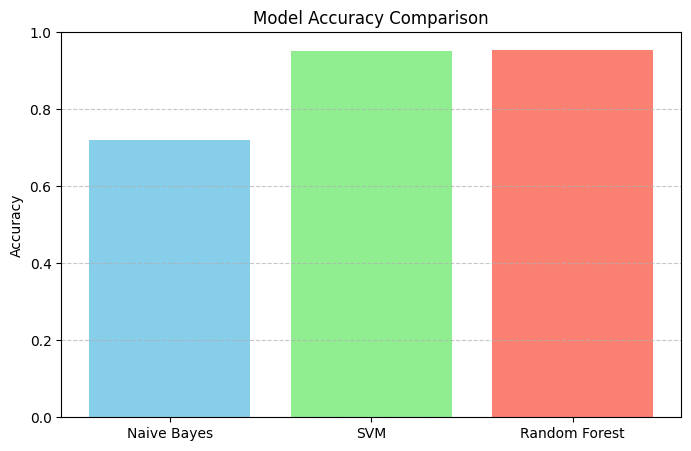

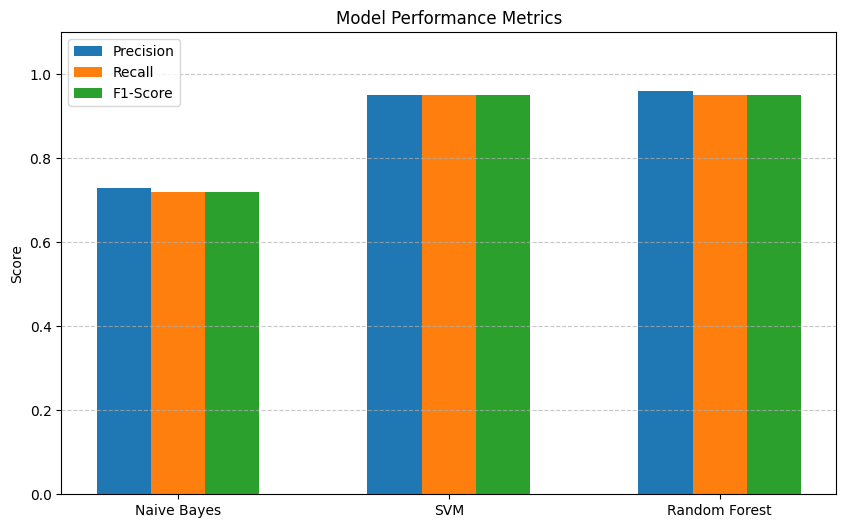

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores
accuracies = {
    "Naive Bayes": 0.7200,
    "SVM": 0.9524,
    "Random Forest": 0.9548
}

# Precision, Recall, F1 for both classes
metrics = {
    "Naive Bayes": [0.73, 0.72, 0.72],
    "SVM": [0.95, 0.95, 0.95],
    "Random Forest": [0.96, 0.95, 0.95]
}

# ----------------- Plot 1: Accuracy Comparison -----------------
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ----------------- Plot 2: Precision, Recall, F1 -----------------
labels = list(metrics.keys())
x = np.arange(len(labels))  # label locations
width = 0.2  # width of bars

# Break down metrics
precision = [metrics[m][0] for m in labels]
recall = [metrics[m][1] for m in labels]
f1 = [metrics[m][2] for m in labels]

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-Score')

plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
